In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
file_path="winequality-white.csv"
wine=pd.read_csv("winequality-white.csv", delimiter=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [24]:
#Handles missing value
wine.fillna(wine.mean(), inplace=True)

In [26]:
#normalise the feature colums(Keeping it in specific range 0 to 10)
scaler=StandardScaler()
# Split features and target
X= scaler.fit_transform(wine.drop("quality", axis=1))
y=wine["quality"]

In [28]:
#Spliting your data set into train test,30-70
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
def classify_quality(x):
    if x>=6:
        return 1 #good quality
    else:
        return 0 #poor quality

In [32]:
# Define parameter grid for k-NN
param_grid_knn={'n_neighbors':range(1,21)}
#Perform GridSearchCV(finds the optimal value of k) with 5-fold cross-validation
grid_knn =GridSearchCV(KNeighborsClassifier(), param_grid_knn,cv=5)
# Train the model
grid_knn.fit(X_train, y_train)
# Get the best k-NN estimator
best_knn=grid_knn.best_estimator_
# Store results in a dictionary
result = {
    "best_k": grid_knn.best_params_['n_neighbors'],
    "best_score": grid_knn.best_score_
}


In [33]:
print(f"Best k: {result['best_k']}, Best Accuracy: {result['best_score']:.4f}")

Best k: 1, Best Accuracy: 0.6076


In [34]:
# Define the parameter grid for SVM
param_grid_svm={'kernel':['linear','poly','rbf']}
# Initialize GridSearchCV with cross-validation (cv=5)
grid_svm= GridSearchCV(SVC(), param_grid_svm, cv=5)
# Fit the model to the training data
grid_svm.fit(X_train, y_train)
# Get the best estimator (model with best performance)
best_svm= grid_svm.best_estimator_
# Print the best model and its parameters
print(f"Best SVM Model: {best_svm}")
print(f"Best Hyperparameters: {grid_svm.best_params_}")

Best SVM Model: SVC()
Best Hyperparameters: {'kernel': 'rbf'}


In [35]:
#Linear Discriminant Analysis(Trains)
lda=LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [36]:
models = {"k-NN":best_knn, "SVM": best_svm, "LDA": lda}
result={}
# Loop through each model in the dictionary
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)  # Assuming X_test is your test data
    
    # Calculate metrics and store them in the results dictionary
    result[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),  # Add average and zero_division for multi-class
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),  # Add average and zero_division for multi-class
        "F1-Score": f1_score(y_test, y_pred, average='weighted', zero_division=0),  # Add average and zero_division for multi-class
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }



k-NN Model performance:
 Accuracy: 0.6136
 Precision: 0.6157
 Recall: 0.6136
 F1-Score: 0.6140


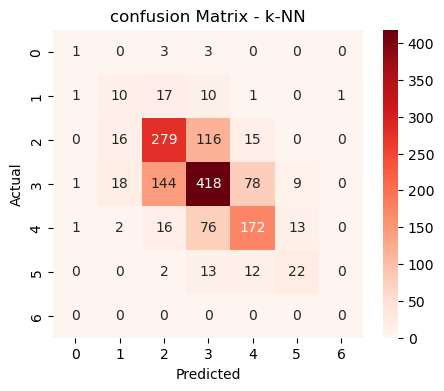


SVM Model performance:
 Accuracy: 0.5653
 Precision: 0.5502
 Recall: 0.5653
 F1-Score: 0.5293


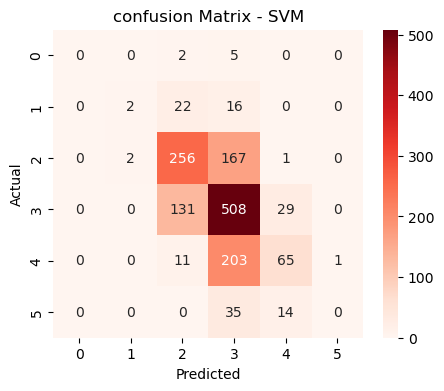


LDA Model performance:
 Accuracy: 0.5306
 Precision: 0.5102
 Recall: 0.5306
 F1-Score: 0.5070


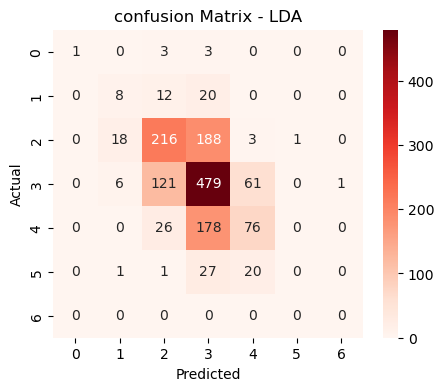

In [48]:
for name, metrics in result.items():
    print(f"\n{name} Model performance:")
    print(f" Accuracy: {metrics['Accuracy']:.4f}")
    print(f" Precision: {metrics['Precision']:.4f}")
    print(f" Recall: {metrics['Recall']:.4f}")
    print(f" F1-Score: {metrics['F1-Score']:.4f}")

    plt.figure(figsize=(5,4))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Reds")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"confusion Matrix - {name}")
    plt.show()